## Projeto WPT (WIRELESS POWER TRANSFER WIRELESS POWER TRANSFER )

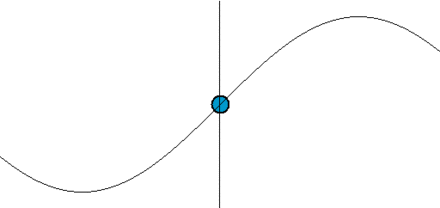

# <h1 style="color:purple"> Objetivo

O projeto WPT (WIRELESS POWER TRANSFER WIRELESS POWER TRANSFER ) consiste em um mecanismo de transmissão de energia sem fio por intermédio do eletromagnetismo e ondulatória.


In [1]:
#Importando Bibliotecas 
from cmath import *
from numpy import linalg
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Definição de Dados Iniciais do TRANSFORMADOR 1 
C1=0.1e-6
C2=0.1e-6
L1=196e-6
L2=196e-6
R1=0.5
R2=0.5
K=1
f=60 #frequencia
w=2*pi*f#calculando a frequencia angular 

## <li style="color:purple"> Etapa 1
### Atividade 1

[ inserir foto do do diagrama do modelo WPT  ]

[inserir demonstração de calculo da frequencia de ressonancia do conjunto LC]

Wressonancia = sqrt(LC)


In [3]:
#função de ressonância 
def Reso(L1, L2, C1, C2): 
    Reso1=1/(2*pi*sqrt(L1*C1))
    Reso2=1/(2*pi*sqrt(L2*C2))
    return Reso1, Reso2

print("A frequência de ressonância é {:.0f} Hz!".format(abs(Reso(L1,L2,C1,C2)[0])))

A frequência de ressonância é 35949 Hz!


### Atividade 2

Criando Funções de Operação 

In [4]:
#função de Indutância mútua 
def M(k,L1, L2): 
    return k*sqrt(L1*L2)



In [5]:
XC1=1/(1j*w*C1) #Capacitância 1
XC2=1/(1j*w*C2) #Capacitância 2 
XL1=1j*w*L1 #Indutância 1
XL2=1J*w*L2 #Indutância 2 
XM=1j*w*M(K,L1,L2)# Indutância Mútua


print(M(K,L1,L2))


(0.000196+0j)


### Atividade 3 e 4

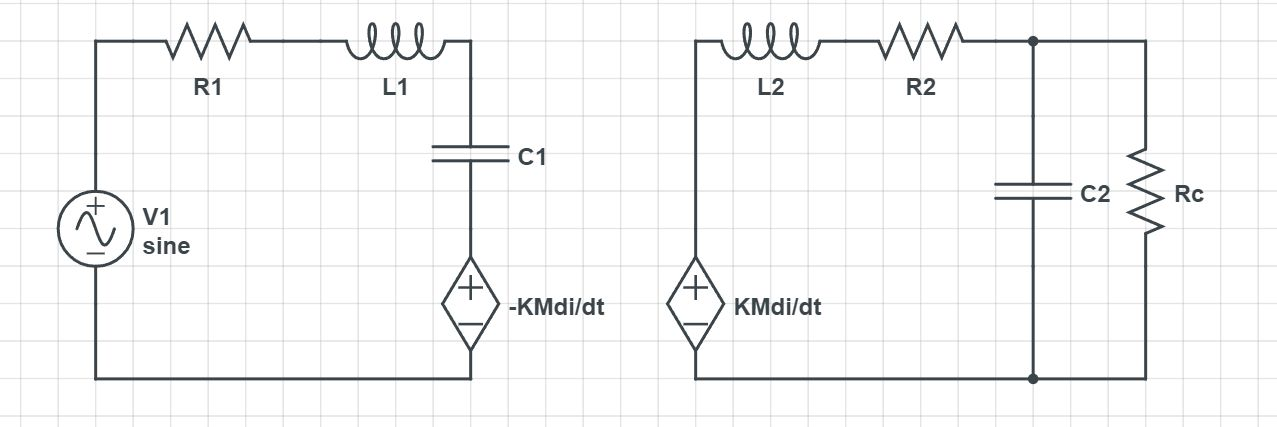

Circuito com um capacitor em série no primário e um em paralelo no secundário 

In [6]:
#Função para as correntes no transformador agora com o capacitor em série no primário e em paralelo no secundário
def CalcularTransformador(Uf, Rc,R1,R2, XC1, XC2, XL1, XL2, XM):
    Z=np.array([[R1+XL1+XC1, -XM],[XM, -XL2-R2-(1/(1/XC2+1/Rc))]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

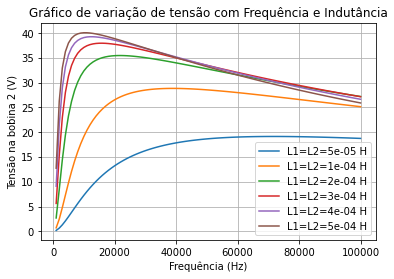

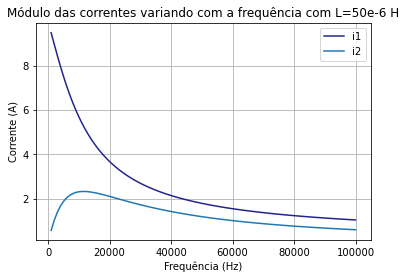

In [7]:


K_2=0.1
Rc_2=400 #valor de resistência do componente que se quer alimentar 

list_indutancias=[50e-6, 100e-6, 200e-6, 300e-6, 400e-6, 500e-6]
lista_frequencias=np.linspace(1e3, 100e3, 100)

lista_i1=[]
lista_i2=[]
for L in list_indutancias: 
    L1_2=L #Indutor no primário 
    L2_2=L #Indutor no secundário 
    lista_Ufs=[]
    for freq in lista_frequencias: 
        w_2=2*pi*freq #frequencia angular variável 
        #recalculando com base em cada valor da lista de frequências 
        C1_2=1/(L1_2*w_2**2) #Capacitor no primário 
        C2_2=1/(L2_2*w_2**2) #Capacitor no secundário
        R1_2=0.5+0.5*5*freq/100e3 #Resistor no primário 
        R2_2=0.5+0.5*5*freq/100e3 #Resistor no secundário
        XC1_2=1/(1j*w_2*C1_2) #Capacitância 1
        XC2_2=1/(1j*w_2*C2_2)#Capacitância 2
        XL1_2=1j*w_2*L1_2 #Indutância 1
        XL2_2=1J*w_2*L2_2 #Indutãncia 2
        XM_2=1j*w_2*M(K_2,L1_2,L2_2) #Indutância Mútua
        i1,i2=CalcularTransformador(5, Rc_2,R1_2,R2_2, XC1_2, XC2_2, XL1_2, XL2_2, XM_2) #correntes no primário e no secundário
        Resistencia_equivalente=1/(1/Rc_2+1/XC2_2) 
        Vsaida=Resistencia_equivalente*i2  #tensão de saída no secundário 
        lista_Ufs.append(abs(Vsaida)) #lista com os valores de tensão no secundário
        if L==50e-6: 
            lista_i1.append(abs(i1))
            lista_i2.append(abs(i2))
    plt.plot(lista_frequencias,lista_Ufs, label="L1=L2=%.0e H" %L)

plt.xlabel("Frequência (Hz)")
##|ax=plt.axes()
#|ax.set_facecolor("#CDCDCD")
plt.ylabel("Tensão na bobina 2 (V)")
plt.title("Gráfico de variação de tensão com Frequência e Indutância")
plt.legend()
plt.grid()
plt.show()

plt.plot(lista_frequencias, lista_i1, label='i1', color='#23238E')
plt.plot(lista_frequencias, lista_i2, label='i2')
plt.title("Módulo das correntes variando com a frequência com L=50e-6 H")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Corrente (A)")
plt.legend()
plt.grid(True)
plt.show()
        

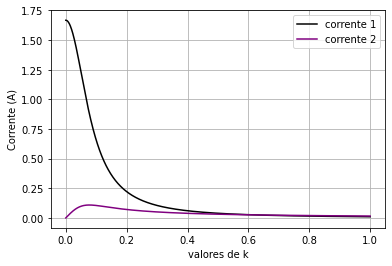

In [8]:
#considerando uma dada frequencia e indutancia fixas
f=100e3 #Hz
L=50e-6
w_2=2*pi*freq #frequencia angular variável 
#recalculando com base em cada valor da lista de frequências 
C1_2=1/(L1_2*w_2**2) #Capacitor no primário 
C2_2=1/(L2_2*w_2**2) #Capacitor no secundário
R1_2=0.5+0.5*5*freq/100e3 #Resistor no primário 
R2_2=0.5+0.5*5*freq/100e3 #Resistor no secundário
XC1_2=1/(1j*w_2*C1_2) #Capacitância 1
XC2_2=1/(1j*w_2*C2_2)#Capacitância 2
XL1_2=1j*w_2*L1_2 #Indutância 1
XL2_2=1J*w_2*L2_2 #Indutãncia 2

lista_ks=np.linspace(0,1,1000)

lista_i1=[]
lista_i2=[]
for k_2 in lista_ks:
    
    XM_3=1j*w_2*M(k_2,L1_2,L2_2) #Indutância Mútua
    i1,i2=CalcularTransformador(5, Rc_2,R1_2,R2_2, XC1_2, XC2_2, XL1_2, XL2_2, XM_3)
    lista_i1.append(abs(i1))
    lista_i2.append(abs(i2))
plt.plot(lista_ks, lista_i1, label='corrente 1', color='black')
plt.plot(lista_ks, lista_i2, label='corrente 2', color='purple')
plt.xlabel('valores de k')
plt.ylabel('Corrente (A)')
plt.legend()
plt.grid(True)
    
        





### Atividade 5


(6.283186337053602e-11+2.0000001547356696e-05j)
(2.513275770670898e-10+4.00000123788565e-05j)
(5.65487511844973e-10+6.000004177865703e-05j)
(1.005312285631289e-09+8.000009903094503e-05j)
(1.5708027635273058e-09+0.0001000001934199508j)
(2.2619600578117824e-09+0.00012000033422996268j)
(3.078785527945244e-09+0.00014000053074534198j)
(4.021280780575209e-09+0.00016000079225053697j)
(5.089447669542351e-09+0.00018000112803009767j)
(6.2832882958876385e-09+0.0002000015473686905j)
(7.602805007860414e-09+0.0002200020595511127j)
(9.048000400927386e-09+0.00024000267386230665j)
(1.0618877317782659e-08+0.0002600033995873751j)
(1.2315438848358599e-08+0.00028000424601159454j)
(1.4137688329837757e-08+0.00030000522242043114j)
(1.608562934666567e-08+0.00032000633809955417j)
(1.815926573056465e-08+0.000340007602334851j)
(2.035860156054847e-08+0.0003600090244124414j)
(2.2683641162938164e-08+0.0003800106136186931j)
(2.5134389111378463e-08+0.00040001237924023415j)
(2.771085022685558e-08+0.0004200143305639702j

(0.0005914340235810519+0.05901299292175933j)
(0.0005926538968056733+0.059069573438966294j)
(0.0005938766998950737+0.059126220489971466j)
(0.0005951024419451806+0.059182934209503005j)
(0.0005963311320872336+0.05923971473264427j)
(0.0005975627794879522+0.05929656219483512j)
(0.0005987973933496965+0.059353476731872995j)
(0.0006000349829106372+0.05941045847991439j)
(0.0006012755574449157+0.05946750757547567j)
(0.0006025191262628192+0.05952462415543466j)
(0.0006037656987109417+0.059581808357031626j)
(0.0006050152841723572+0.059639060317870564j)
(0.0006062678920667878+0.0596963801759204j)
(0.0006075235318507756+0.05975376806951632j)
(0.0006087822130178541+0.05981122413736091j)
(0.0006100439450987206+0.059868748518525396j)
(0.0006113087376614104+0.05992634135245095j)
(0.0006125766003114715+0.05998400277894994j)
(0.0006138475426921393+0.06004173293820708j)
(0.000615121574484513+0.060099531970780815j)
(0.0006163987054077354+0.0601574000176046j)
(0.0006176789452191685+0.060215337219988035j)
(0.0

(0.36679714856551526-0.6072003765403711j)
(0.3628899547562473-0.6064603597381829j)
(0.3590189946953309-0.6056872938236j)
(0.3551843672581459-0.6048821217116231j)
(0.35138615012543706-0.6040457735482868j)
(0.34762440053471005-0.6031791664179158j)
(0.3438991560225674-0.6022832040804454j)
(0.34021043515717836-0.601358776737648j)
(0.3365582382601331-0.6004067608271002j)
(0.3329425481170244-0.5994280188427361j)
(0.3293633306761358-0.5984233991808511j)
(0.325820535734728-0.5973937360104221j)
(0.3223140976124174-0.5963398491666357j)
(0.31884393581125414-0.5952625440665251j)
(0.31540995566211744-0.5941626116456414j)
(0.31201204895713386-0.5930408283147104j)
(0.3086500945678458-0.5918979559352326j)
(0.3053239590489408-0.5907347418130319j)
(0.30203349722732775-0.5895519187087563j)
(0.29877855277650184-0.5883502048643923j)
(0.29555895877602706-0.58713030404484j)
(0.2923745382561793-0.5858929055936752j)
(0.2892251047276298-0.5846386845021899j)
(0.28611046269628587-0.5833683014909012j)
(0.283030408

(0.0011187513720644492-0.07826001085956652j)
(0.0011176851600508528-0.07822674012922234j)
(0.0011166206095712713-0.07819350135312232j)
(0.001115557717052642-0.07816029448364657j)
(0.001114496478931648-0.0781271194732712j)
(0.001113436891654668-0.07809397627456745j)
(0.0011123789516777605-0.078060864840202j)
(0.0011113226554666181-0.07802778512293622j)
(0.001110267999496547-0.07799473707562637j)
(0.0011092149802524268-0.07796172065122296j)
(0.0011081635942286879-0.07792873580277096j)
(0.0011071138379292697-0.07789578248340909j)
(0.001106065707867602-0.07786286064637j)
(0.0011050192005665602-0.07782997024497967j)
(0.001103974312558445-0.07779711123265744j)
(0.0011029310403849488-0.0777642835629157j)
(0.0011018893805971237-0.07773148718935967j)
(0.0011008493297553512-0.0776987220656871j)
(0.0010998108844293103-0.07766598814568802j)
(0.0010987740411979516-0.07763328538324464j)
(0.001097738796649465-0.07760061373233108j)
(0.0010967051473812462-0.07756797314701304j)
(0.0010956730899998714-0.

(0.00033534884720960067-0.04479145002015082j)
(0.000335200691517907-0.04478200176653267j)
(0.0003350526425231628-0.044772557975047866j)
(0.00033490470011800666-0.04476311864237795j)
(0.00033475686419521665-0.04475368376520779j)
(0.00033460913464770865-0.04474425334022564j)
(0.00033446151136853626-0.04473482736412308j)
(0.0003343139942508924-0.044725405833595036j)
(0.0003341665831881066-0.04471598874533976j)
(0.00033401927807364654-0.04470657609605888j)
(0.0003338720788011167-0.044697167882457284j)
(0.0003337249852642592-0.04468776410124324j)
(0.0003335779973569534-0.04467836474912836j)
(0.000333431114973214-0.044668969822827455j)
(0.00033328433800719335-0.04465957931905877j)
(0.00033313766635317983-0.044650193234543806j)
(0.0003329910999055976-0.04464081156600738j)
(0.00033284463855900727-0.04463143431017764j)
(0.00033269828220810387-0.044622061463785924j)
(0.0003325520307477191-0.04461269302356698j)
(0.0003324058840728191-0.044603328986258774j)
(0.0003322598420785056-0.044593969348602

(0.00017368441124989076-0.03260479227530297j)
(0.00017363333661142243-0.03260012117331097j)
(0.00017358228607988364-0.03259545153956208j)
(0.00017353125963940857-0.03259078337332767j)
(0.00017348025727414461-0.032586116673879596j)
(0.0001734292789682529-0.03258145144049026j)
(0.00017337832470590777-0.03257678767243249j)
(0.00017332739447129713-0.032572125368979646j)
(0.0001732764882486218-0.032567464529405565j)
(0.0001732256060220966-0.0325628051529846j)
(0.00017317474777594913-0.03255814723899156j)
(0.00017312391349442086-0.032553490786701784j)
(0.00017307310316176623-0.032548835795391085j)
(0.00017302231676225306-0.03254418226433575j)
(0.00017297155428016238-0.03253953019281259j)
(0.00017292081569978885-0.03253487958009888j)
(0.00017287010100543984-0.032530230425472394j)
(0.00017281941018143642-0.0325255827282114j)
(0.00017276874321211277-0.03252093648759463j)
(0.00017271810008181627-0.032516291702901344j)
(0.00017266748077490743-0.03251164837341126j)
(0.00017261688527576017-0.032507

C:\Users\taina\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


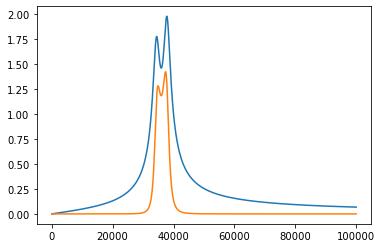

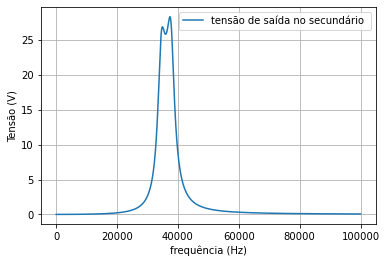

In [9]:
#COM O TRANFORMADOR 1 

lista_Ufs=[]
lista_potencias=[]
lista_potencia_primario=[]
lista_potencia_secundario=[]
L1_2=L2_2=196e-6
K_3=0.11
Vin=10/pi
lista_frequencias=np.arange(10,100000, 10)

for freq in lista_frequencias: 
    w_2=2*pi*freq #frequencia angular variável 
    #recalculando com base em cada valor da lista de frequências 
    C1_2=0.1e-6 #Capacitor no primário 
    C2_2=0.1e-6 #Capacitor no secundário
    R1_2=0.5 #Resistor no primário 
    R2_2=0.5 #Resistor no secundário
    XC1_2=1/(1j*w_2*C1_2) #Capacitância 1
    XC2_2=1/(1j*w_2*C2_2)#Capacitância 2
    XL1_2=1j*w_2*L1_2 #Indutância 1
    XL2_2=1J*w_2*L2_2 #Indutãncia 2
    XM_2=1j*w_2*M(K_3,L1_2,L2_2) #Indutância Mútua
    I1,i2=CalcularTransformador(Vin, Rc_2,R1_2,R2_2, XC1_2, XC2_2, XL1_2, XL2_2, XM_2) #correntes no primário e no secundário
    Resistencia_equivalente=1/(1/Rc_2+1/XC2_2) 
    Vsaida=Resistencia_equivalente*i2  #tensão de saída no secundário 
    lista_Ufs.append(abs(Vsaida)) #lista com os valores de tensão no secundário
    
    
    
    #####################################################################
    S_prima=(Vin/sqrt(2))*I1.conjugate()#pq não precisa divir por sqrt(2)? 
    lista_potencia_primario.append(abs(S_prima))
    
    i_r=Vsaida/Rc_2
    S_secu=Vsaida/sqrt(2)*i_r.conjugate()
    lista_potencia_secundario.append(S_secu)
    print(I1)
    

plt.plot(lista_frequencias,lista_potencia_primario)
plt.plot(lista_frequencias,lista_potencia_secundario)
plt.show()
plt.plot(lista_frequencias,lista_Ufs,label='tensão de saída no secundário ' )
plt.grid(True)
plt.xlabel('frequência (Hz)')
plt.ylabel('Tensão (V)')
plt.legend()
plt.show()